# White Box - Supervised ML Project
__Name:__ Abdulla Mohamed

__Topic Name:__ Video Game Sales

## Introduction
A gaming company wants to predict which video games will perform best in the global market. We will be using historical video games sales data that analyzis more then 16500 games across multiple regions, this project will explores how regional sales and release years influence global sales.

### Problem Statement
A gaming company needs to predict which video games will be
successful in the global market to optimize their development
and marketing investments.The output is expected to be
explained to a non-technical audience

### Objectives
List the key questions guiding your analysis and modeling:

- Identify which features will affect global sales the most.

- See if better feature selection or scaling improves results.

- Compare model versions with different settings to find out which one predicts global sales better.


## Data Overview
__Load and inspect the dataset__
- Source and format
- .head(), .info(), .describe(),…


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline



import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline  
np.set_printoptions(legacy='1.25')

In [2]:
# Import Data
data = pd.read_csv('./Data/vgsales.csv')

In [3]:
# Data Inspection

# Data Shape
data.shape

(16598, 11)

In [4]:
# Data First Rows
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
# Data Statistics
data.describe(include='all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16327.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.406443,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.828981,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


## Data Cleaning
__Handle missing values, outliers, and inconsistencies__
- Rename columns
- Fix data types
- Document assumptions


In [7]:
# Check for Nulls
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
# Check for Data Types
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [9]:
# Fill Missing Years With Median and Change The Type Rrom 'object' Into 'int'
data.Year = data.Year.fillna(data.Year.median())
data['Year'] = data['Year'].astype(int)

In [10]:
# Fill The Missing Publisher Data With 'Unknown'
data['Publisher'] = data['Publisher'].fillna('Uknown')

In [11]:
# Verify
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [12]:
# Check For Duplicates 
data.duplicated(keep=False)

0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Length: 16598, dtype: bool

In [13]:
# Rename The Region Sales Columns
data.rename(columns={
    'NA_Sales': 'North_America_Sales',
    'EU_Sales': 'Europe_Sales',
    'JP_Sales': 'Japan_Sales',
    'Other_Sales': 'Other_Regions_Sales',
    'Global_Sales': 'Global_Sales'
}, inplace=True)


In [14]:
# Count The Values by Year
data['Year'].value_counts().sort_index().tail(4)

Year
2015    614
2016    344
2017      3
2020      1
Name: count, dtype: int64

In [15]:
#Excluding 2016,2017 & 2020 Data is Reliable for Analysis
data = data[(data['Year'] >= 1980) & (data['Year'] <= 2016)]

In [16]:
# Summary
display('Shape of dataset:', data.shape)
display('Missing values:', data.isnull().sum())
display('Data types:', data.dtypes)
display('Statistics:', data.describe())

'Shape of dataset:'

(16594, 11)

'Missing values:'

Rank                   0
Name                   0
Platform               0
Year                   0
Genre                  0
Publisher              0
North_America_Sales    0
Europe_Sales           0
Japan_Sales            0
Other_Regions_Sales    0
Global_Sales           0
dtype: int64

'Data types:'

Rank                     int64
Name                    object
Platform                object
Year                     int64
Genre                   object
Publisher               object
North_America_Sales    float64
Europe_Sales           float64
Japan_Sales            float64
Other_Regions_Sales    float64
Global_Sales           float64
dtype: object

'Statistics:'

,Rank,Year,North_America_Sales,Europe_Sales,Japan_Sales,Other_Regions_Sales,Global_Sales
count,16594.000000,16594.000000,16594.000000,16594.000000,16594.000000,16594.000000,16594.000000
mean,8299.409967,2006.413402,0.264715,0.146687,0.077797,0.048073,0.537550
std,4791.349951,5.779669,0.816774,0.505407,0.309326,0.188610,1.555198
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4150.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8299.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12447.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## Exploratory Data Analysis (EDA)
### Analysis
__Answer objectives using visual and statistical insights__
- Trends, relationships, anomalies
- Outlier and missing values treatment
- Univariate, bivariate, or multivariate analysis
    - Histograms, box plots, bar charts
    - Correlation matrix for continuous columns (required if applicable)


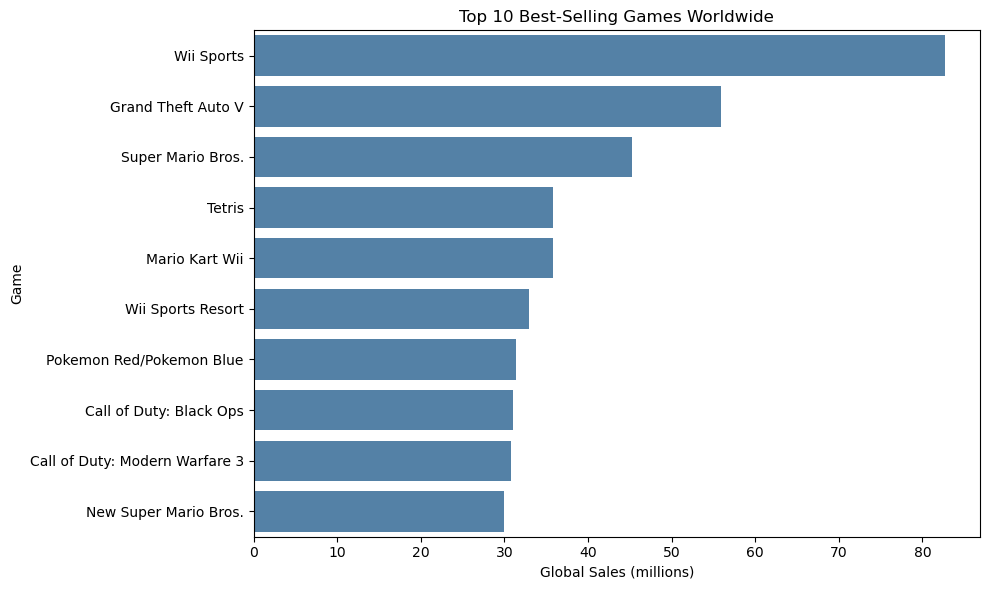

In [17]:
# Top 10 Selling Games World Wide
sales_by_game = data.groupby('Name', as_index=False)[
   ['North_America_Sales', 'Europe_Sales','Japan_Sales','Other_Regions_Sales','Global_Sales']
].sum()



top10_global = sales_by_game.sort_values('Global_Sales', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top10_global, x='Global_Sales', y='Name', color='steelblue')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Game')
plt.title('Top 10 Best-Selling Games Worldwide')
plt.tight_layout()
plt.show()


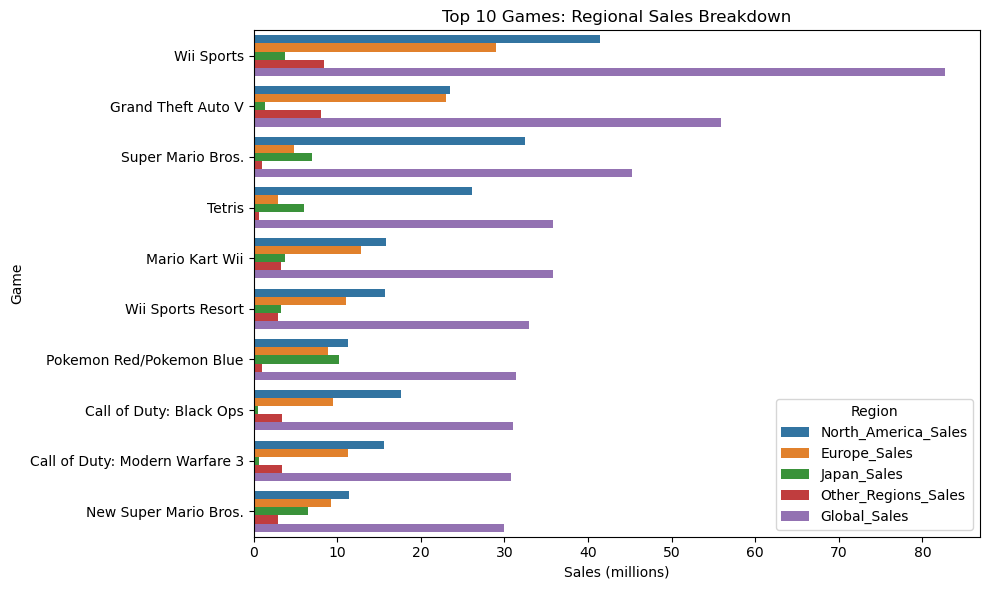

In [18]:
# Top 10 Games by Region Sales

top10_melt = top10_global.melt(
    id_vars='Name',
    value_vars=['North_America_Sales', 'Europe_Sales','Japan_Sales','Other_Regions_Sales','Global_Sales'],
    var_name='Region',
    value_name='Sales'
)

plt.figure(figsize=(10,6))
sns.barplot(data=top10_melt, x='Sales', y='Name', hue='Region')
plt.xlabel('Sales (millions)')
plt.ylabel('Game')
plt.title('Top 10 Games: Regional Sales Breakdown')
plt.legend(title='Region')
plt.tight_layout()
plt.show()


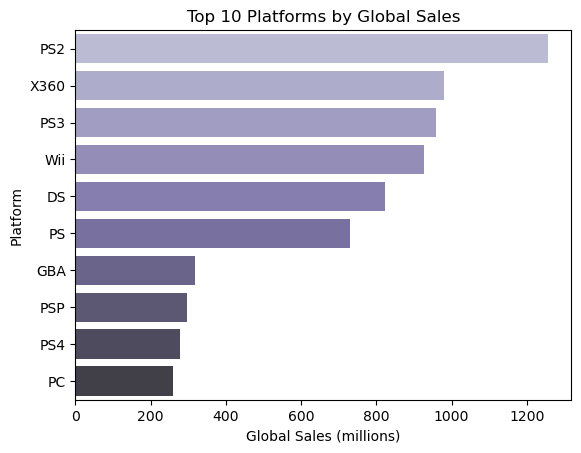

In [19]:
# Global Sales by Platform
platform_sales = data.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=platform_sales.values, y=platform_sales.index, palette='Purples_d')
plt.title('Top 10 Platforms by Global Sales')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Platform')
plt.show()

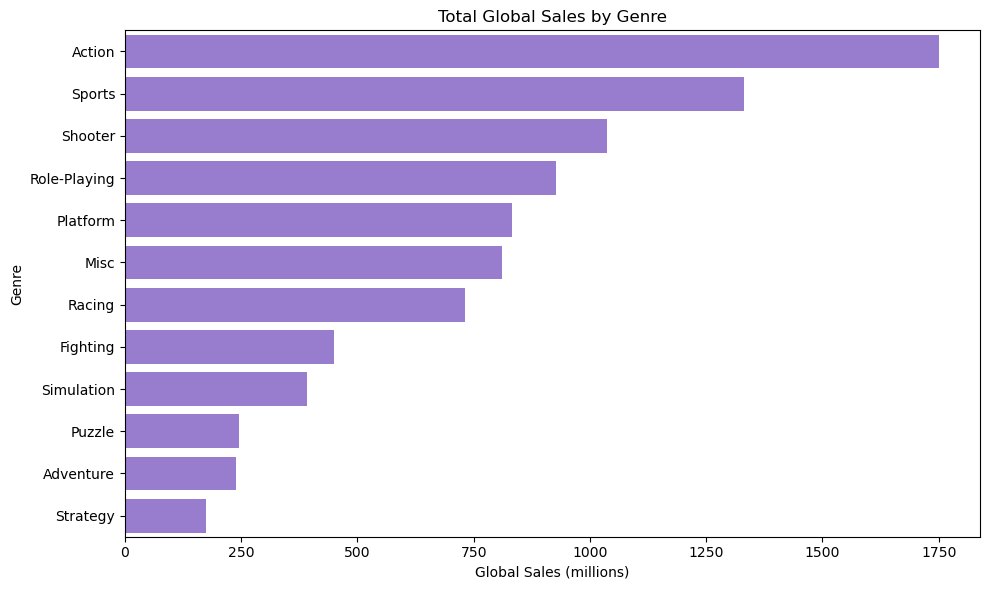

In [20]:
# Global Sales by Genre
sales_by_genre = data.groupby('Genre', as_index=False)['Global_Sales'].sum()
sales_by_genre = sales_by_genre.sort_values('Global_Sales', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=sales_by_genre, x='Global_Sales', y='Genre', color='mediumpurple')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Genre')
plt.title('Total Global Sales by Genre')
plt.tight_layout()
plt.show()


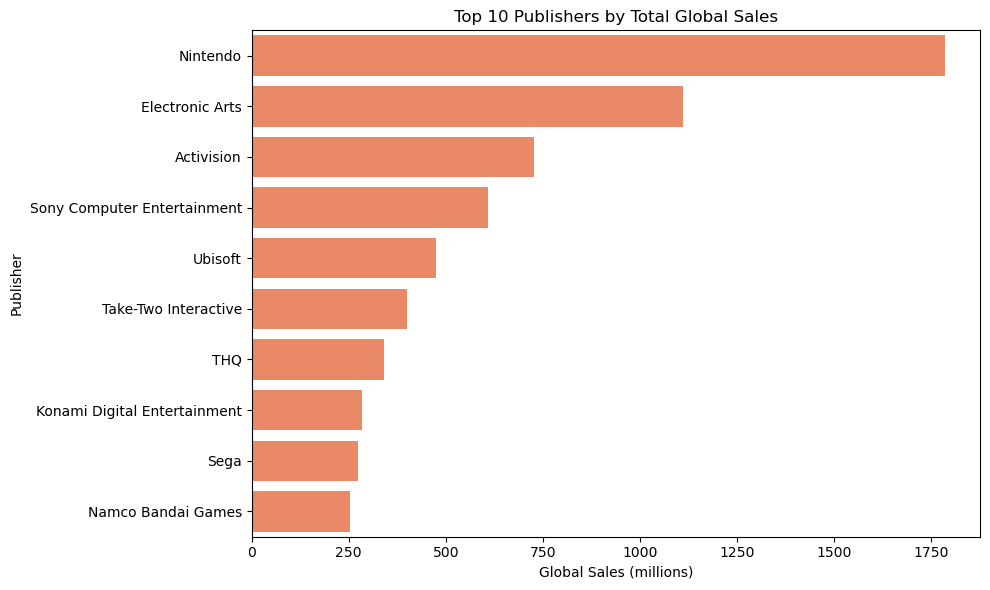

In [21]:
#Top 10 Publishers by Total Global Sales

sales_by_publisher = data.groupby('Publisher', as_index=False)['Global_Sales'].sum()
sales_by_publisher = sales_by_publisher.sort_values('Global_Sales', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=sales_by_publisher, x='Global_Sales', y='Publisher', color='coral')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Publisher')
plt.title('Top 10 Publishers by Total Global Sales')
plt.tight_layout()
plt.show()


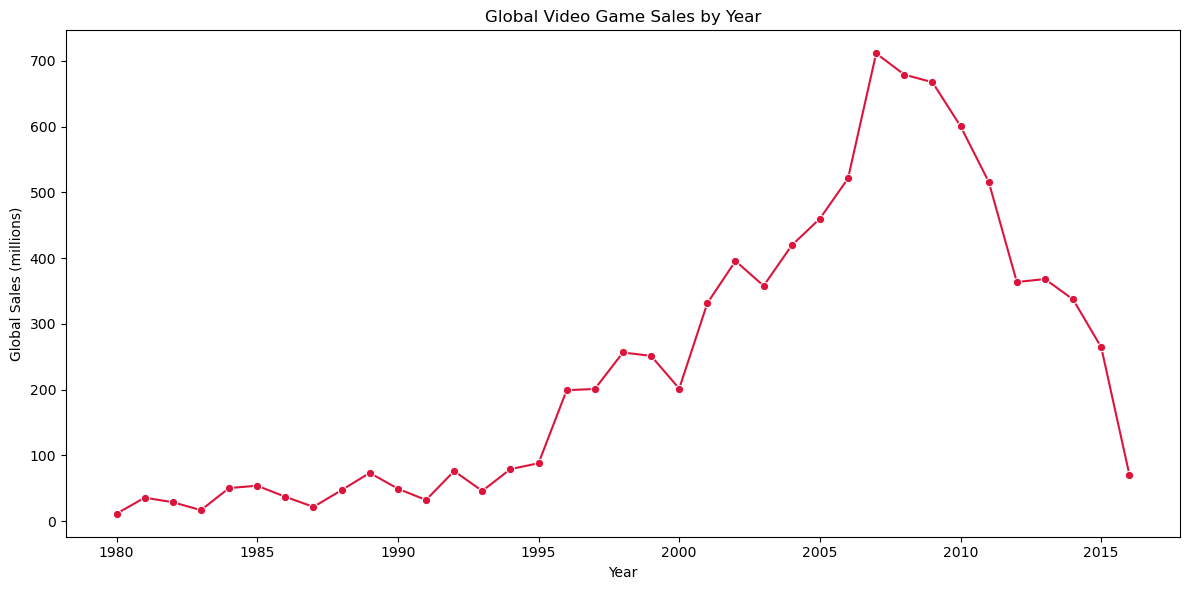

In [22]:
#Global Video Game Sales by Year trend

sales_by_year = data.groupby('Year', as_index=False)['Global_Sales'].sum()
plt.figure(figsize=(12,6))
sns.lineplot(data=sales_by_year, x='Year', y='Global_Sales', marker='o', color='crimson')
plt.xlabel('Year')
plt.ylabel('Global Sales (millions)')
plt.title('Global Video Game Sales by Year')
plt.tight_layout()
plt.show()


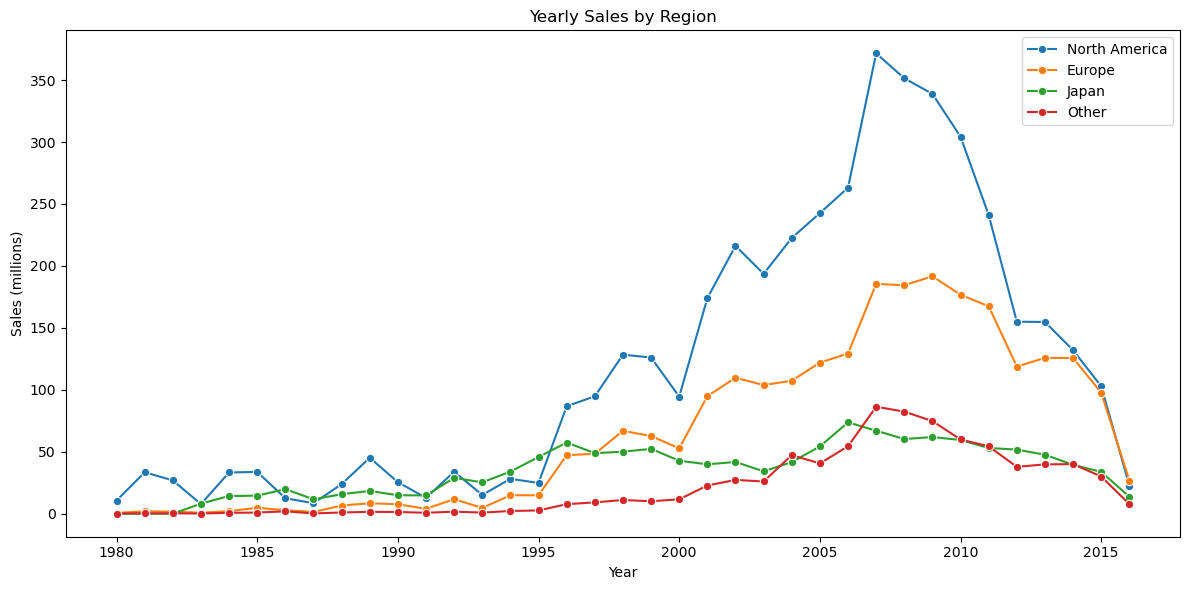

In [23]:
# Yearly Sales by Region

regional_by_year = data.groupby('Year')[['North_America_Sales', 'Europe_Sales','Japan_Sales','Other_Regions_Sales','Global_Sales']].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=regional_by_year, x='Year', y='North_America_Sales', label='North America', marker='o')
sns.lineplot(data=regional_by_year, x='Year', y='Europe_Sales', label='Europe', marker='o')
sns.lineplot(data=regional_by_year, x='Year', y='Japan_Sales', label='Japan', marker='o')
sns.lineplot(data=regional_by_year, x='Year', y='Other_Regions_Sales', label='Other', marker='o')

plt.xlabel('Year')
plt.ylabel('Sales (millions)')
plt.title('Yearly Sales by Region')
plt.legend()
plt.tight_layout()
plt.show()


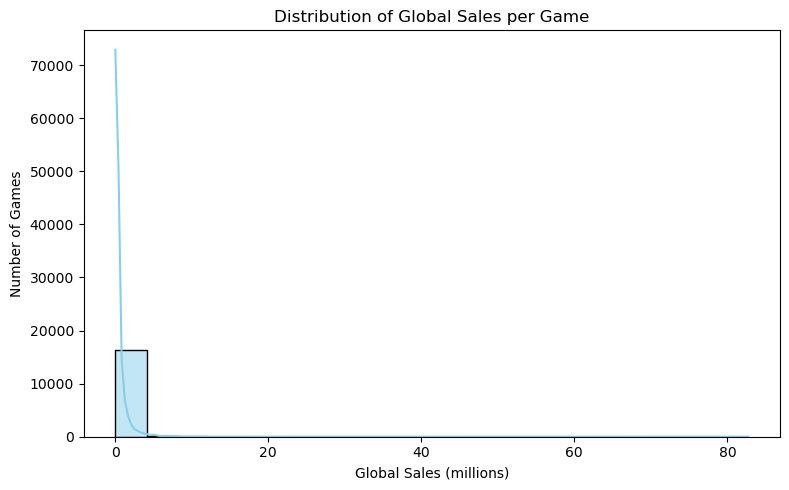

In [24]:
# Distribution of Global Sales per Game
plt.figure(figsize=(8,5))
sns.histplot(data['Global_Sales'], bins=20, kde=True, color='skyblue')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Number of Games')
plt.title('Distribution of Global Sales per Game')
plt.tight_layout()
plt.show()


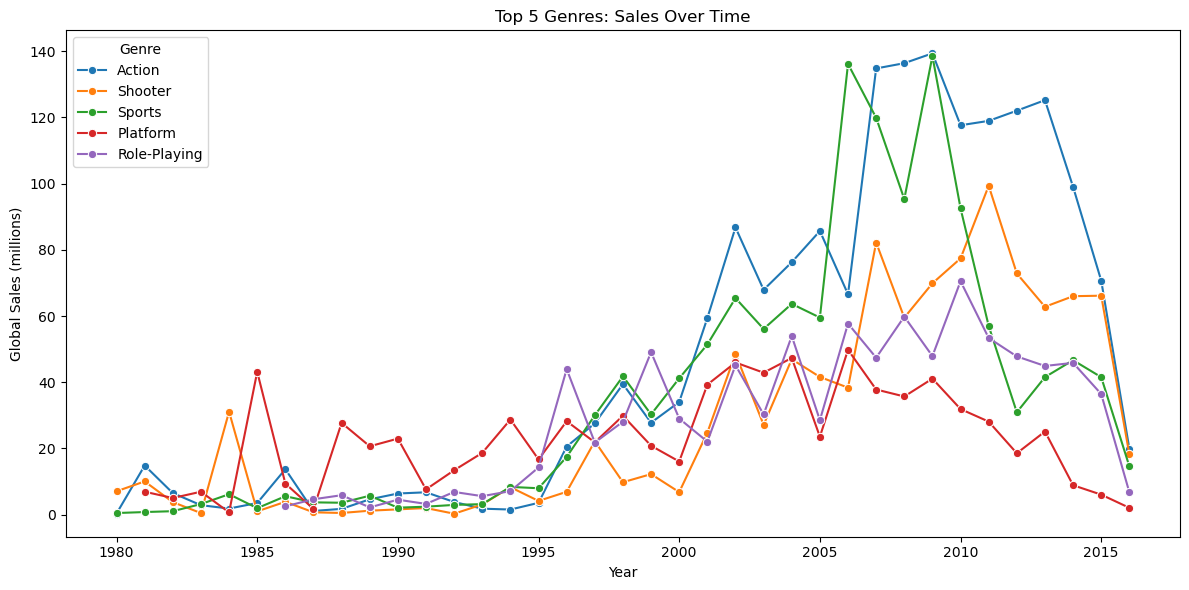

In [25]:
# Top 5 Genres by Sales

top_genres = (
    data.groupby('Genre')['Global_Sales'].sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

data_top_genres = data[data['Genre'].isin(top_genres)]
genre_year_sales = (
    data_top_genres.groupby(['Year','Genre'])['Global_Sales'].sum().reset_index()
)

plt.figure(figsize=(12,6))
sns.lineplot(data=genre_year_sales, x='Year', y='Global_Sales', hue='Genre', marker='o')
plt.xlabel('Year')
plt.ylabel('Global Sales (millions)')
plt.title('Top 5 Genres: Sales Over Time')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()


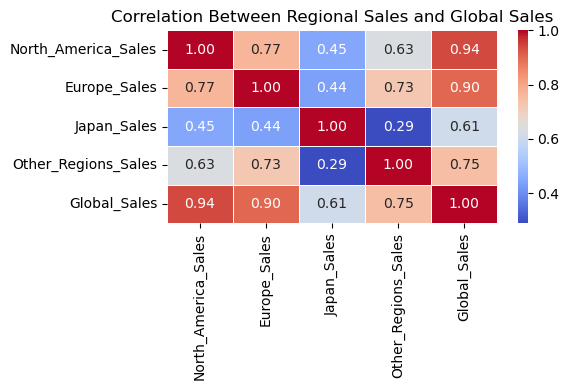

In [26]:
# Correlations
numeric_cols = ['North_America_Sales', 'Europe_Sales','Japan_Sales','Other_Regions_Sales','Global_Sales']
corr = data[numeric_cols].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Between Regional Sales and Global Sales')
plt.tight_layout()
plt.show()


### Data Handling for Modeling
- __Transform, encode, and prepare features__
    - Categorical encoding
    - Feature scaling (especially for KNN)
## Will Do Within The Model Building

## Model Building
__Build and compare two models for your topic__
### Model 1: Linear / Logistic Regression
- Version 1: baseline
- Version 2: modified features or tuned parameters
- Checking if model assumptions were met
 ...


## Version 1: Basline (X = Year, y= Global Sales)

In [27]:
# Identify X,y
X1 = data[['Year']]
y1 = data['Global_Sales']

In [28]:
# Train_Test_Split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=42)

print('X_train shape:', X_train1.shape)
print('X_test shape:', X_test1.shape)
print('y_train shape:', y_train1.shape)
print('y_test shape:', y_test1.shape)

X_train shape: (12445, 1)
X_test shape: (4149, 1)
y_train shape: (12445,)
y_test shape: (4149,)


In [29]:
# Model Training
lr1 = LinearRegression()
lr1.fit(X_train1, y_train1)

LinearRegression()

In [30]:
# Intercept and Coeffcients
print('Intercept:', lr1.intercept_)
print('Coefficient:', lr1.coef_)

Intercept: 46.616470736481325
Coefficient: [-0.02296854]


In [31]:
# Prediction
y_pred1 = lr1.predict(X_test1)

## Version 2: Added More Features(Year + All The Region Sales)

In [32]:
# Identify X,y
X2 = data[['Year', 'North_America_Sales', 'Europe_Sales', 'Japan_Sales', 'Other_Regions_Sales']]
y2 = data['Global_Sales']

In [33]:
# Train_Test_Split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=42)

print('X_train shape:', X_train2.shape)
print('X_test shape:', X_test2.shape)
print('y_train shape:', y_train2.shape)
print('y_test shape:', y_test2.shape)

X_train shape: (12445, 5)
X_test shape: (4149, 5)
y_train shape: (12445,)
y_test shape: (4149,)


In [34]:
# Model Training
lr2 = LinearRegression()
lr2.fit(X_train2, y_train2)

LinearRegression()

In [35]:
# Intercept and Coeffcients
print('Intercept:', lr2.intercept_)
print('Coefficients:')
set(zip(X2.columns, lr2.coef_))

Intercept: 0.009111626752392077
Coefficients:


{('Europe_Sales', 0.9998872380818987),
 ('Japan_Sales', 1.000072281821914),
 ('North_America_Sales', 0.9999181530055483),
 ('Other_Regions_Sales', 0.9992872426840596),
 ('Year', -4.373890943306527e-06)}

In [36]:
# Prediction
y_pred2 = lr2.predict(X_test2)

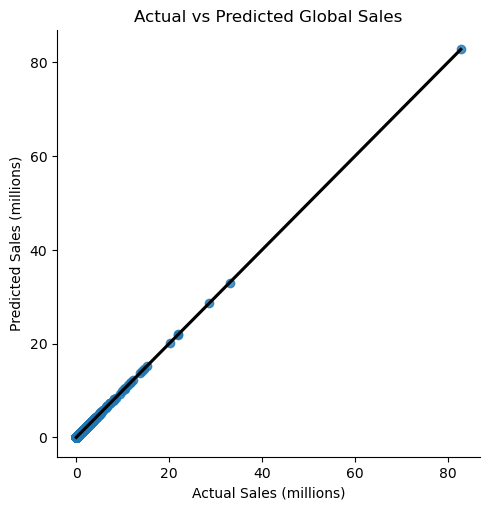

In [37]:
# Actual vs Predicted Global Sales Plot
results2 = pd.DataFrame({
    'Actual Sales': y_test2,
    'Predicted Sales': y_pred2
})

sns.lmplot(
    x='Actual Sales',
    y='Predicted Sales',
    data=results2,
    ci=None,
    line_kws={'color': 'black'}
)

plt.title('Actual vs Predicted Global Sales')
plt.xlabel('Actual Sales (millions)')
plt.ylabel('Predicted Sales (millions)')
plt.show()

### Model 2: KNN Regressor / KNN Classifier
- Version 1: baseline
- Version 2: modified features or tuned parameters
- Checking if model assumptions were met 
 ...


## Version 1: Baseline k=5 and Year and North_America_Sales as the Predictors

In [38]:
# Identigy X,y
X3 = data[['Year', 'North_America_Sales']]
y3 = data['Global_Sales']

In [39]:
display(X3.shape)
display(y3.shape)

(16594, 2)

(16594,)

In [40]:
# Train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25, random_state=42)

In [41]:
# X_train and X_test Scaling
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train3)
X_test_sc = sc.transform(X_test3)

display(X_train_sc.shape)
display(X_test_sc.shape)

(12445, 2)

(4149, 2)

In [42]:
# Model Training
knn1 = KNeighborsRegressor(n_neighbors=5)
knn1.fit(X_train_sc, y_train3)

KNeighborsRegressor()

In [43]:
# Cross Validation
cv = cross_val_score(knn1, X_train_sc, y_train3, cv=10)

print(f'CV mean accuracy (k=5): {cv.mean():.4f}')
print(f'CV std: {cv.std():.4f}')

CV mean accuracy (k=5): 0.8771
CV std: 0.0294


In [44]:
# Training and Testing Accuracy

train_acc1 = knn1.score(X_train_sc, y_train3)
test_acc1 = knn1.score(X_test_sc, y_test3)
print(f'Training accuracy: {train_acc1:.4f}')
print(f'Testing accuracy: {test_acc1:.4f}')

Training accuracy: 0.9192
Testing accuracy: 0.7451


In [45]:
# Predction
y_pred3 = knn1.predict(X_test_sc)

## Version 2: Getting the Best K through GridSearchCV and using Pipline, While Adding More Regoins

In [46]:
# Identfy X, y
X4 = data[['Year', 'North_America_Sales', 'Europe_Sales', 'Japan_Sales', 'Other_Regions_Sales']]
y4 = data['Global_Sales']

In [47]:
# Train_test_split

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

In [48]:
# Scaline
sc2 = StandardScaler()
X_train_sc2 = sc2.fit_transform(X_train4)
X_test_sc2 = sc2.transform(X_test4)

In [49]:
# Create the pipline
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('knn', KNeighborsRegressor())
])


In [50]:
# Create GridSearchCV object and tunening it
prgrid = {
    'knn__n_neighbors': np.arange(1, 101, 2)
}
gs = GridSearchCV(
    estimator=pipe,
    param_grid=prgrid,
    cv=10,
    scoring='r2',
    n_jobs=8
)


In [51]:
# Train The Model
gs.fit(X_train4, y_train4)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=8,
             param_grid={'knn__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])},
             scoring='r2')

In [52]:
# Best K number and CV

best_params = gs.best_params_
best_cv_r2  = gs.best_score_

print("Best params from GridSearchCV:", best_params)
print("Best CV R2 from GridSearchCV:", best_cv_r2)

Best params from GridSearchCV: {'knn__n_neighbors': 5}
Best CV R2 from GridSearchCV: 0.9727248354128726


In [53]:
# Predction

best = gs.best_estimator_

y_pred4 = best.predict(X_test4)

### Model Evaluation
__Use appropriate metrics based on task type and compare between the Models and their versions__

__For Regression:__
- R² Score
- Root Mean Squared Error (RMSE)
- Residual plots


## Linear Regression:

In [54]:
# Linear Regression Version 1 vs Version 2 Evaluation Metrics Comparison

mse_1 = metrics.mean_squared_error(y_test1, y_pred1)
rmse_1 = np.sqrt(mse_1)
r2_1 = metrics.r2_score(y_test1, y_pred1)

mse_2 = metrics.mean_squared_error(y_test2, y_pred2)
rmse_2 = np.sqrt(mse_2)
r2_2 = metrics.r2_score(y_test2, y_pred2)

eval_reg = pd.DataFrame({
    'MSE':  [mse_1, mse_2],
    'RMSE': [rmse_1, rmse_2],
    'R2':   [r2_1, r2_2]
})
print('Regression Evaluation:')
display(eval_reg)

Regression Evaluation:


,MSE,RMSE,R2
0,3.539176,1.881270,-0.000198
1,0.000027,0.005235,0.999992


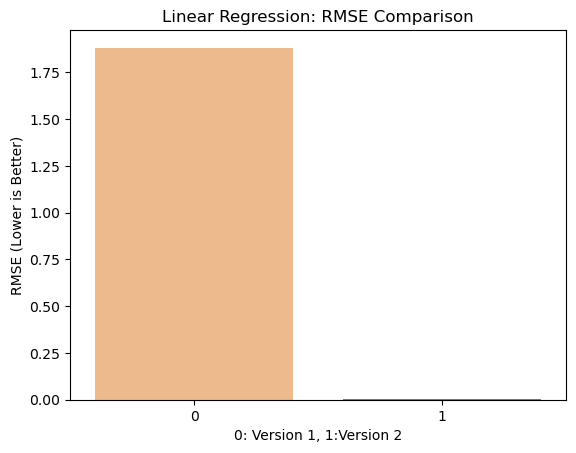

In [55]:
# RMSE Plot
sns.barplot(
    x=[0,1],
    y='RMSE',
    data=eval_reg,
    palette='Oranges'
)
plt.title('Linear Regression: RMSE Comparison')
plt.ylabel('RMSE (Lower is Better)')
plt.xlabel('0: Version 1, 1:Version 2')
plt.show()

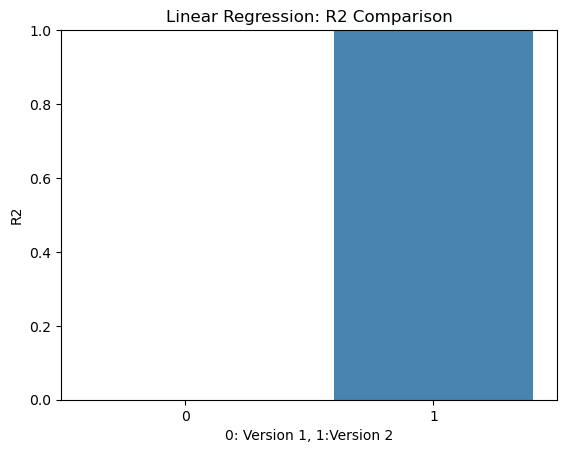

In [56]:
# R2 Plot

sns.barplot(x=[0,1], y='R2', data=eval_reg, palette='Blues')
plt.title('Linear Regression: R2 Comparison')
plt.xlabel('0: Version 1, 1:Version 2')
plt.ylim(0, 1)
plt.show()

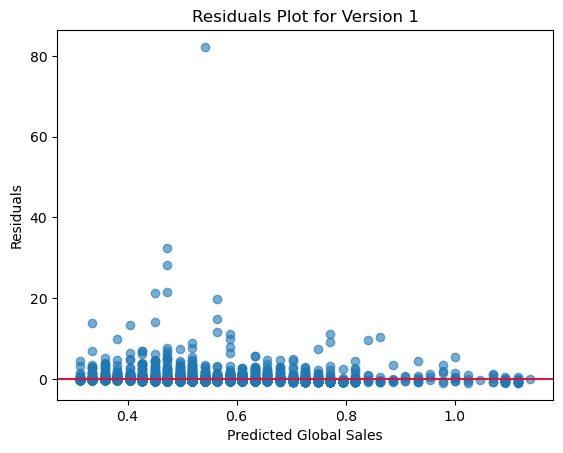

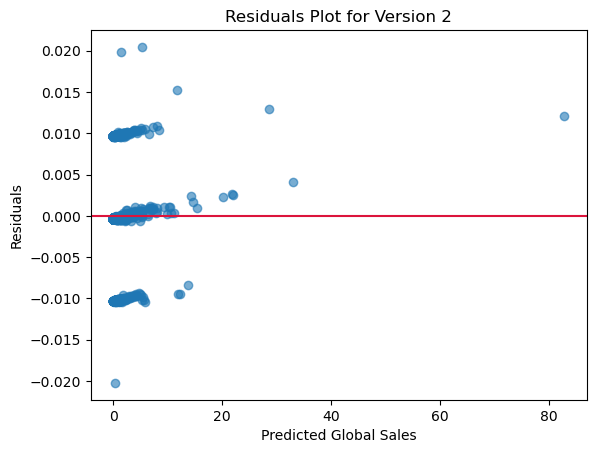

In [57]:
# Residual Plot

residuals_1 = y_test1 - y_pred1
plt.scatter(y_pred1, residuals_1, alpha=0.6)
plt.axhline(0, color='crimson')
plt.title('Residuals Plot for Version 1')
plt.xlabel('Predicted Global Sales')
plt.ylabel('Residuals')
plt.show()

residuals_2 = y_test2 - y_pred2
plt.scatter(y_pred2, residuals_2, alpha=0.6)
plt.axhline(0, color='crimson')
plt.title('Residuals Plot for Version 2')
plt.xlabel('Predicted Global Sales')
plt.ylabel('Residuals')
plt.show()

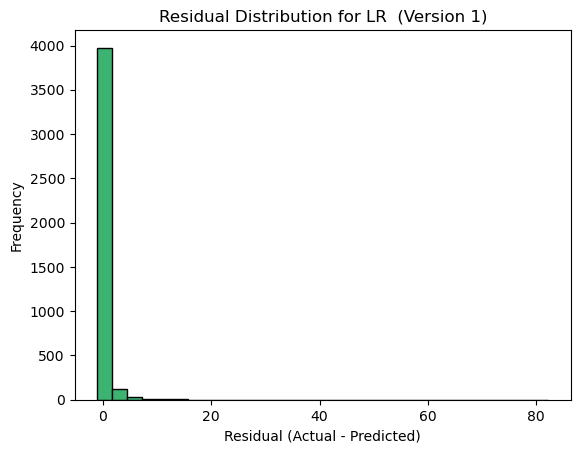

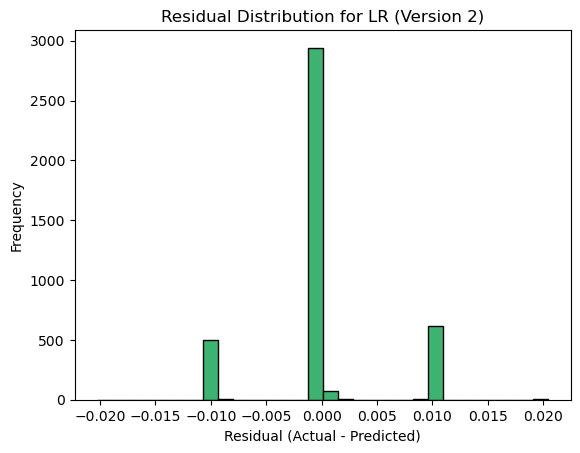

In [58]:
# Risdual Histograms
plt.hist(residuals_1, bins=30, color='mediumseagreen', edgecolor='black')
plt.title('Residual Distribution for LR  (Version 1)')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


plt.hist(residuals_2, bins=30, color='mediumseagreen', edgecolor='black')
plt.title('Residual Distribution for LR (Version 2)')
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


## KNN

In [59]:
# KNN Version 1 vs Version 2 Evaluation Metrics Comparison

mse_1 = metrics.mean_squared_error(y_test3, y_pred3)
rmse_1 = np.sqrt(mse_1)
r2_1 = metrics.r2_score(y_test3, y_pred3)


mse_2 = metrics.mean_squared_error(y_test4, y_pred4)
rmse_2 = np.sqrt(mse_2)
r2_2 = metrics.r2_score(y_test4, y_pred4)

knn_eval = pd.DataFrame({
    'Model Version': [
        'KNN Regressor Version 1',
        'KNN Regressor Version 2'
    ],
    'MSE': [mse_1, mse_2],
    'RMSE': [rmse_1, rmse_2],
    'R2': [r2_1, r2_2],
})

display(knn_eval)

,Model Version,MSE,RMSE,R2
0,KNN Regressor Version 1,0.902045,0.949761,0.745075
1,KNN Regressor Version 2,0.941974,0.970553,0.775849


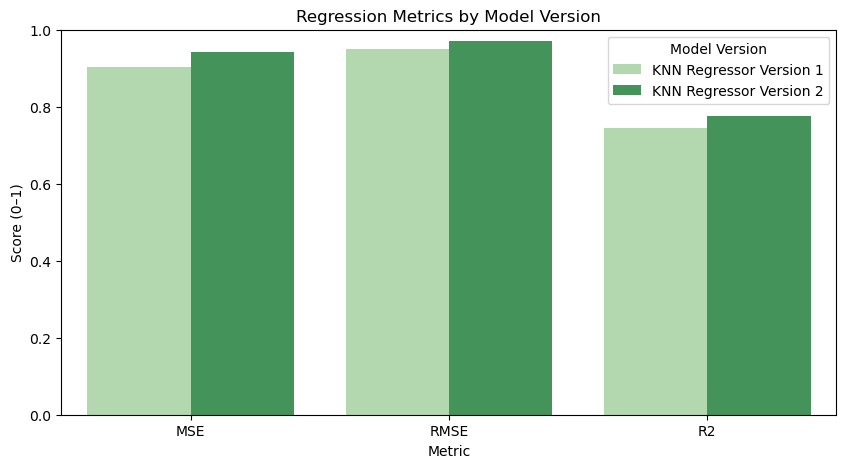

In [60]:
# Plot for all classification metrics
metrics_to_plot = ['MSE', 'RMSE', 'R2']

class_long = knn_eval.melt(
    id_vars='Model Version',
    value_vars=metrics_to_plot,
    var_name='Metric',
    value_name='Score'
)

plt.figure(figsize=(10,5))
sns.barplot(
    data=class_long,
    x='Metric',
    y='Score',
    hue='Model Version',
    palette='Greens'
)
plt.ylim(0, 1)
plt.title('Regression Metrics by Model Version')
plt.ylabel('Score (0–1)')
plt.legend(title="Model Version")
plt.show()


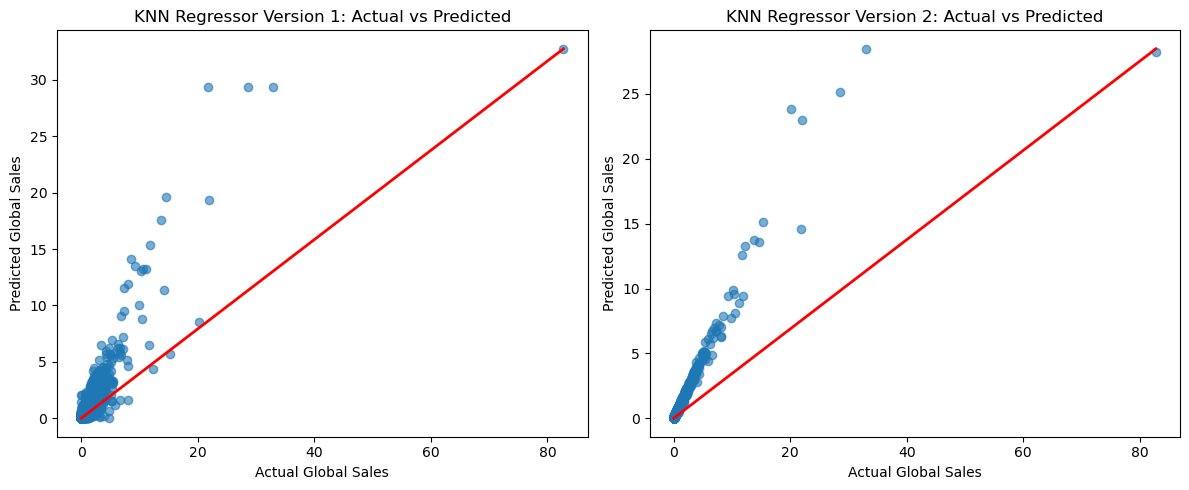

In [61]:
# Actual vs Predicted (Version 1 vs Version 2) Plot

plt.figure(figsize=(12,5))

#Version 1
plt.subplot(1,2,1)
plt.scatter(y_test3, y_pred3, alpha=0.6)
plt.plot([y_test3.min(), y_test3.max()],
         [y_pred3.min(), y_pred3.max()],
         color='red', linewidth=2)
plt.title("KNN Regressor Version 1: Actual vs Predicted")
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")

#Version 2
plt.subplot(1,2,2)
plt.scatter(y_test4, y_pred4, alpha=0.6)
plt.plot([y_test4.min(), y_test4.max()],
         [y_pred4.min(), y_pred4.max()],
         color='red', linewidth=2)
plt.title("KNN Regressor Version 2: Actual vs Predicted")
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")

plt.tight_layout()
plt.show()


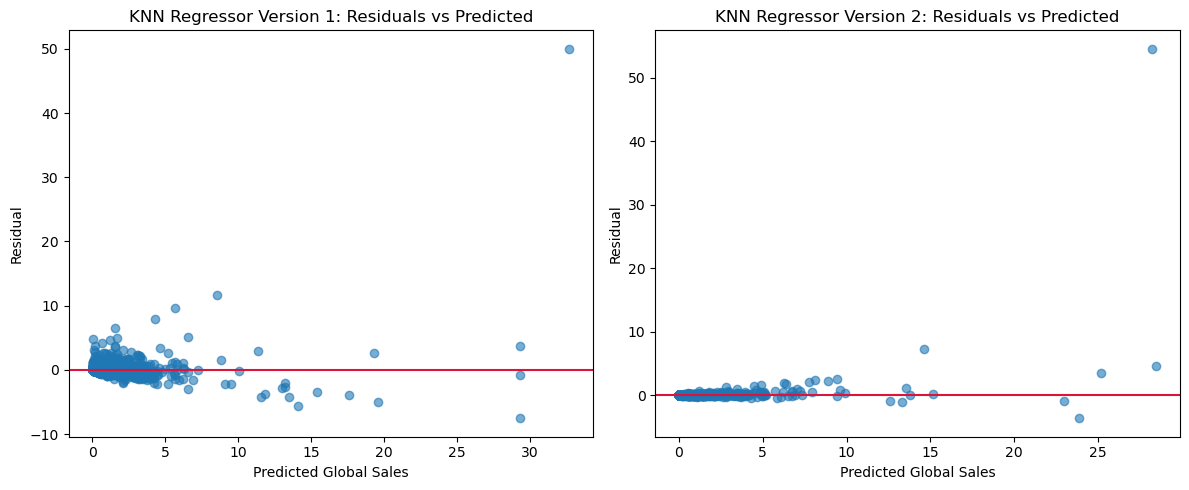

In [62]:
resids_1 = y_test3 - y_pred3
resids_2 = y_test4 - y_pred4

plt.figure(figsize=(12,5))

# Version 1 residuals
plt.subplot(1,2,1)
plt.scatter(y_pred3, resids_1, alpha=0.6)
plt.axhline(0, color='crimson')
plt.title("KNN Regressor Version 1: Residuals vs Predicted")
plt.xlabel("Predicted Global Sales")
plt.ylabel("Residual")

# Version 2 residuals
plt.subplot(1,2,2)
plt.scatter(y_pred4, resids_2, alpha=0.6)
plt.axhline(0, color='crimson')
plt.title("KNN Regressor Version 2: Residuals vs Predicted")
plt.xlabel("Predicted Global Sales")
plt.ylabel("Residual")

plt.tight_layout()
plt.show()


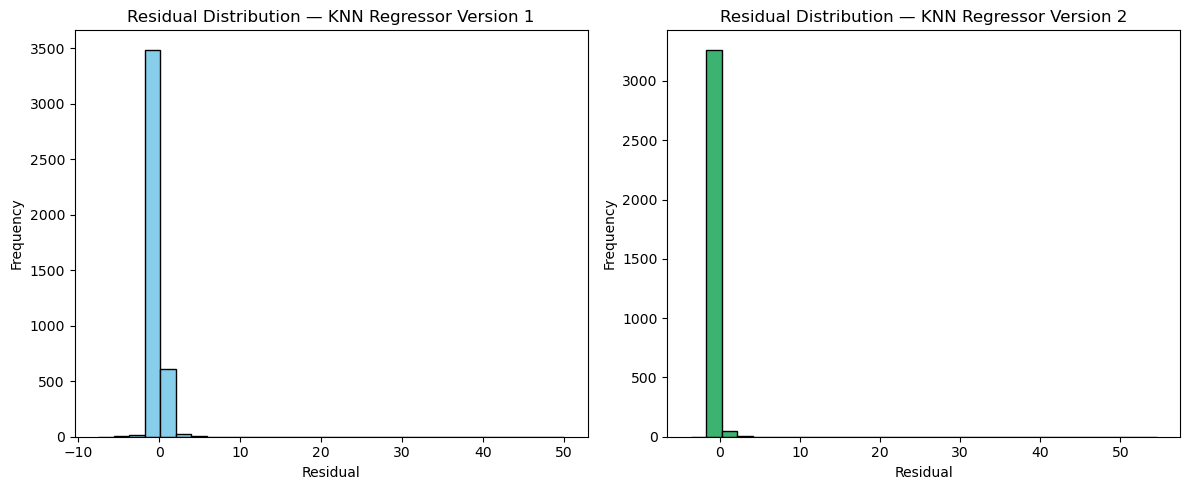

In [63]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(resids_1, bins=30, color="skyblue", edgecolor="black")
plt.title("Residual Distribution — KNN Regressor Version 1")
plt.xlabel("Residual")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(resids_2, bins=30, color="mediumseagreen", edgecolor="black")
plt.title("Residual Distribution — KNN Regressor Version 2")
plt.xlabel("Residual")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


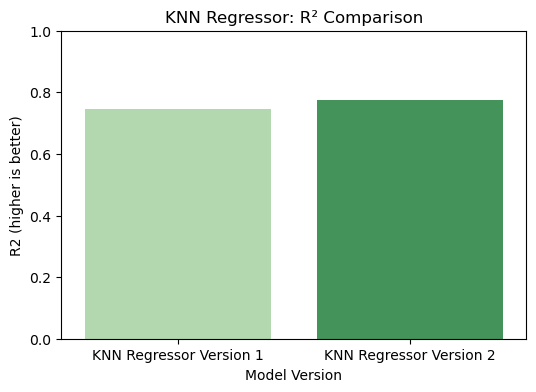

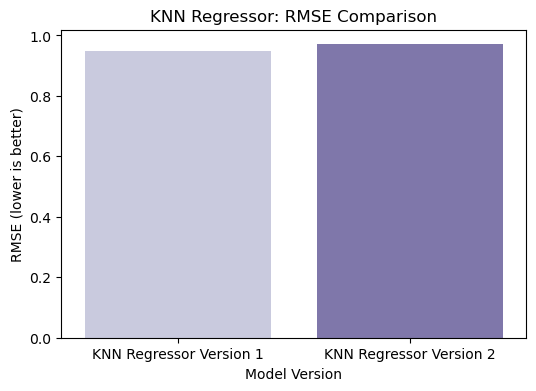

In [64]:

# R2 comparison Plot
plt.figure(figsize=(6,4))
sns.barplot(
    x='Model Version', y='R2',
    data=knn_eval, palette='Greens'
)
plt.title('KNN Regressor: R² Comparison')
plt.ylim(0,1)
plt.ylabel("R2 (higher is better)")
plt.show()

# RMSE comparison Plot
plt.figure(figsize=(6,4))
sns.barplot(
    x='Model Version', y='RMSE',
    data=knn_eval, palette='Purples'
)
plt.title('KNN Regressor: RMSE Comparison')
plt.ylabel("RMSE (lower is better)")
plt.show()


### Model Comparison
__Compare performance across models and versions__

__Note:__ _Use Bullet Points or table_
- Which model performed best and why
- Impact of feature changes or tuning
- Generalization and overfitting observations


## Linear Regression:

#### Linear Regression Version 1: (Only Years) 

- R2: -0.0007
- RMSE: 1.910
- Observation: The R2 and RMSE indicate Poor Performance and also Risdual was very scattered so no linearty also 


#### Linear Regression Version 2: (Years + Regoinal Sales) 
- Added the all regoins as predictors
- R2: 0.9999
- RMSE: 0.0053
- Observation: The R2 and RMSE almost perfect relationship and also Risdual was centered more around zero, so strong linearity


#### Generalization & Overfitting Observation
- The second version near perfect R2 is beacause of the data redundacy not overfitting, it generalize well within the dataset.

## K-Nearest Neighbors (KNN):

#### KNN Version 1: (k = 5) 
- Chose k=5 as a baseline + Used only the Year And the North_Amirca_Sales as predictors.
- MSE = 0.902, RMSE = 0.950, R2 = 0.745.
- Cross-Validation Mean = 0.877 (CV STD = 0.0029)
##### Observation:
- Moderate performance, The R2 value indicate that the model captured relationship between North America Sales and global Sales
- The residual plots showed bias for high selling games, which indecate underfitting for high values


#### KNN Version 2: (K=7) 
- Added more X features(Regoins Sales) and standarized via pipline and tuned the k via GridSearchCV
- MSE = 0.941974, RMSE = 0.970553, R2 = 0.775849
- Cross-Validation Mean = 0.973
##### Observation:
- Adding all regoin sales increased the R2 from 0.745 into 0.776
- The tuning with the pipline reduced the resdiual spred and produced much better Actual vs Predicted plot alignment.


#### Generalization & Overfitting Observation
- No Overfitting as both versions maintained mild underfitting train ve test performance.
- The seconed version achieved higher R2 which resulted in less variance.


## Final Model & Insights
__Summarize your final model and key takeaways__

__Note__: _Use Bullet Points_
- Final model choice
- Business implications
- Limitations and future improvements


## Final Model Choice


#### K-Nearest Neighbors Version 2 
- Tuned using a pipeline with StandardScaler and GridSearchCV
- Out preformed the baseline model
- Had better generalization

## Business Implications

- All Regoins had influnce on the global sales.
- The companies can predict games global success better by using data fromm multiple regoins

## Limitations and Future Improvements

- Limitation: The model performance may degrade if future data include new regions.
- In the future I will try to include categorical variables such as Genre, Platform, and Publisher to see if there is improvements.

## References & Appendix
__Cite tools, libraries, and sources used__

Dataset: https://www.kaggle.com/datasets/gregorut/videogamesales